pip install yfinance

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
import yfinance as yf
import datetime

start = '2015-03-01'
end = datetime.datetime.now().strftime('%Y-%m-%d')
stock = 'AAPL'

df = yf.download(stock, start=start, end=end)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-02,28.791616,29.057029,28.615420,28.827303,192386800
2015-03-03,28.851830,28.887516,28.568574,28.762617,151265200
2015-03-04,28.668945,28.896442,28.619881,28.793848,126665200
2015-03-05,28.193880,28.715782,28.048907,28.677866,226068400
2015-03-06,28.236250,28.854057,28.160419,28.637712,291368400


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500
2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700
2025-05-29,199.949997,203.809998,198.509995,203.580002,51396800
2025-05-30,200.850006,201.960007,196.779999,199.369995,70753100


In [5]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-03-02,28.791616,29.057029,28.615420,28.827303,192386800
1,2015-03-03,28.851830,28.887516,28.568574,28.762617,151265200
2,2015-03-04,28.668945,28.896442,28.619881,28.793848,126665200
3,2015-03-05,28.193880,28.715782,28.048907,28.677866,226068400
4,2015-03-06,28.236250,28.854057,28.160419,28.637712,291368400


In [6]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-03-02,28.791616,29.057029,28.615420,28.827303,192386800
1,2015-03-03,28.851830,28.887516,28.568574,28.762617,151265200
2,2015-03-04,28.668945,28.896442,28.619881,28.793848,126665200
3,2015-03-05,28.193880,28.715782,28.048907,28.677866,226068400
4,2015-03-06,28.236250,28.854057,28.160419,28.637712,291368400
...,...,...,...,...,...,...
2574,2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2575,2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500
2576,2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700


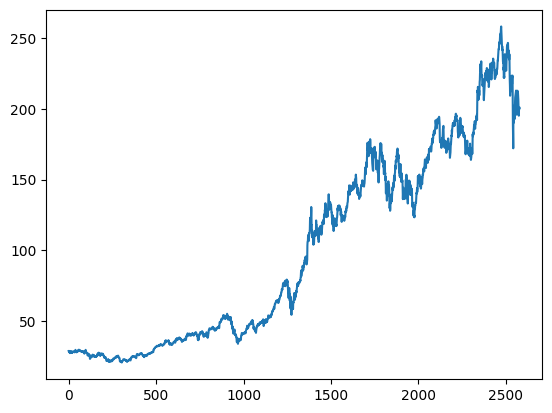

In [7]:
import matplotlib.pyplot as plt
plt.plot(df["Close"])

In [8]:
ma_100_days = df["Close"].rolling(100).mean().dropna()
ma_100_days

Ticker,AAPL
99,28.447388
100,28.439789
101,28.430109
102,28.418384
103,28.412775
...,...
2574,220.759969
2575,220.246138
2576,219.752164
2577,219.319032


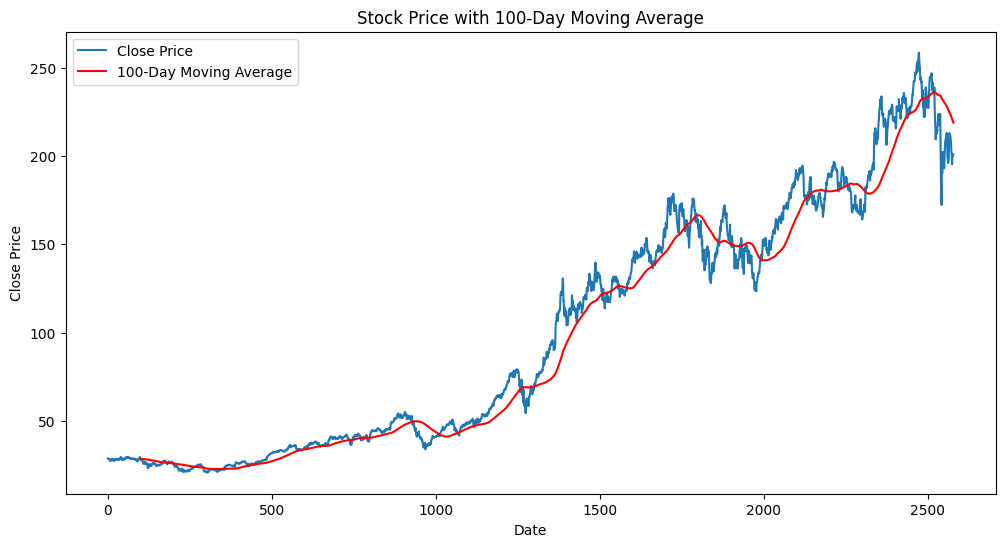

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price")
plt.plot(ma_100_days, 'r', label="100-Day Moving Average")
plt.title("Stock Price with 100-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [10]:
ma_200_days = df.Close.rolling(200).mean()
ma_200_days

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2574,225.402617
2575,225.359450
2576,225.299965
2577,225.223548


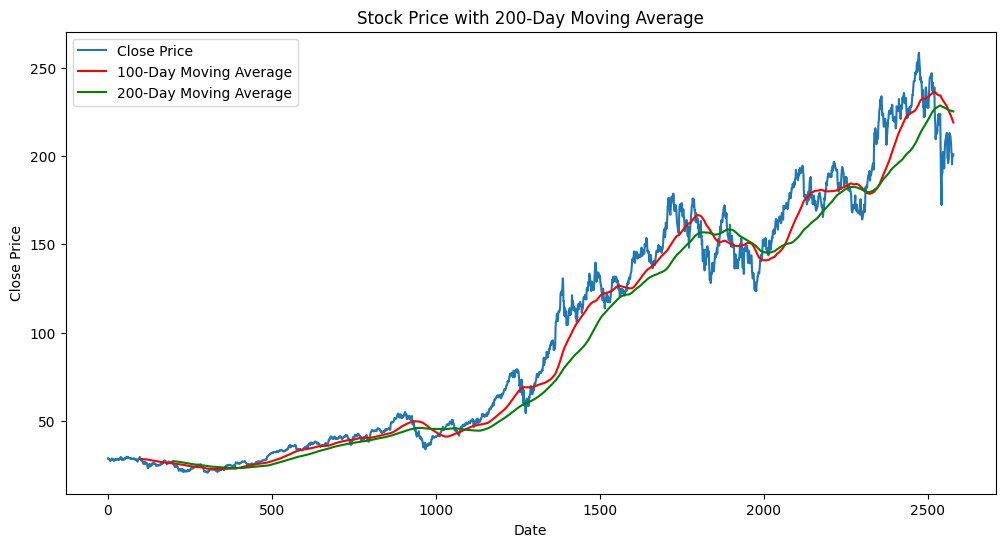

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price")
plt.plot(ma_100_days, 'r', label="100-Day Moving Average")
plt.plot(ma_200_days, 'g', label="200-Day Moving Average")
plt.title("Stock Price with 200-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [12]:
df.shape

(2579, 6)

In [13]:
#spliting data into training and testing

data_train = pd.DataFrame(df.Close[0: int(len(df)*0.70)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.70): len(df)])
print(data_train.shape)
print(data_test.shape)

(1805, 1)
(774, 1)


In [14]:
data_train.head()

Ticker,AAPL
0,28.791616
1,28.851830
2,28.668945
3,28.193880
4,28.236250


In [15]:
data_test.head()

Ticker,AAPL
1805,154.933060
1806,155.237732
1807,156.731506
1808,163.158844
1809,154.068253


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_array = scaler.fit_transform(data_train)
data_train_array
data_train_array.shape

(1805, 1)

In [18]:
x = []
y = []

for i in range(100, data_train_array.shape[0]):
    x.append(data_train_array[i-100:i])
    y.append(data_train_array[i,0])
x

[array([[0.05154591],
        [0.05192701],
        [0.0507695 ],
        [0.04776273],
        [0.04803089],
        [0.04879322],
        [0.04508059],
        [0.04187619],
        [0.04499589],
        [0.04378189],
        [0.04570175],
        [0.04865207],
        [0.05067069],
        [0.04930138],
        [0.04704274],
        [0.04889202],
        [0.04815795],
        [0.04348545],
        [0.04469945],
        [0.043302  ],
        [0.04770623],
        [0.04496768],
        [0.04471358],
        [0.04622404],
        [0.04908966],
        [0.04719808],
        [0.04661932],
        [0.04797444],
        [0.04873678],
        [0.04838386],
        [0.04760746],
        [0.04828503],
        [0.04742393],
        [0.04541946],
        [0.04944254],
        [0.04846855],
        [0.0508824 ],
        [0.05236463],
        [0.05322572],
        [0.05657132],
        [0.05362098],
        [0.05091066],
        [0.04598407],
        [0.05134828],
        [0.05099536],
        [0

In [ ]:
import numpy as np
x, y = np.array(x), np.array(y)

In [20]:
# ML model

In [21]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

In [22]:
model = Sequential()
model.add(Input(shape=(x.shape[1], 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x, y, epochs=50, batch_size=32,verbose =1)

Epoch 1/50


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0700
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0068
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 0.0055
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0053
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 0.0049
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0053
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0050
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0044
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0053
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0049
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0042
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0040
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0050
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0035
Epoch 15/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0050
Epoch 16/5

In [25]:
model.summary()
data_test.head()
model.save('keras_model.keras')
data_train.tail()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

Ticker,AAPL
1800,159.001724
1801,160.072922
1802,154.097717
1803,153.871689
1804,160.819839


In [26]:
pas_100_days = data_train.tail(100)

In [27]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test.head()

Ticker,AAPL
0,162.264175
1,168.015823
2,171.843735
3,171.333359
4,176.132996


In [28]:
data_test_array  =  scaler.fit_transform(data_test)
data_test_array
data_test_array.shape

(874, 1)

In [29]:
x = []
y = []

for i in range(100, data_test_array.shape[0]):
    x.append(data_test_array[i-100:i])
    y.append(data_test_array[i,0])
x, y = np.array(x), np.array(y)
print(x.shape)
print(y.shape)

(774, 100, 1)
(774,)


In [30]:
#making predictions
y_predict = model.predict(x)
y_predict.shape

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


(774, 1)

In [31]:
scale =1/scaler.scale_
print("y_predict:", y_predict)
print("y_predict shape:", y_predict.shape)

y_predict: [[0.30093747]
 [0.29774666]
 [0.2947573 ]
 [0.2919926 ]
 [0.28952727]
 [0.28734982]
 [0.28542358]
 [0.28357598]
 [0.28168988]
 [0.27948982]
 [0.27618945]
 [0.27110237]
 [0.26396197]
 [0.25482947]
 [0.244211  ]
 [0.23316711]
 [0.22243854]
 [0.21213117]
 [0.2018952 ]
 [0.19171554]
 [0.18183139]
 [0.1727681 ]
 [0.16505527]
 [0.15899058]
 [0.15466496]
 [0.15195152]
 [0.15062049]
 [0.15043122]
 [0.15112606]
 [0.15236717]
 [0.1538295 ]
 [0.15518005]
 [0.15610297]
 [0.15628216]
 [0.15551502]
 [0.15371391]
 [0.15094195]
 [0.14735562]
 [0.14321902]
 [0.1389157 ]
 [0.13482626]
 [0.13116978]
 [0.12808898]
 [0.1256002 ]
 [0.123693  ]
 [0.12237995]
 [0.12168682]
 [0.12167265]
 [0.12238912]
 [0.12381678]
 [0.12586835]
 [0.12843254]
 [0.13139874]
 [0.1346777 ]
 [0.13818157]
 [0.14184459]
 [0.14562723]
 [0.14950572]
 [0.15347554]
 [0.15749064]
 [0.16147104]
 [0.16540615]
 [0.16934924]
 [0.17341545]
 [0.17770982]
 [0.18226416]
 [0.18729433]
 [0.19281775]
 [0.19900526]
 [0.20602071]
 [0.21375

In [32]:
y_predict = y_predict*scale

In [33]:
y = y*scale

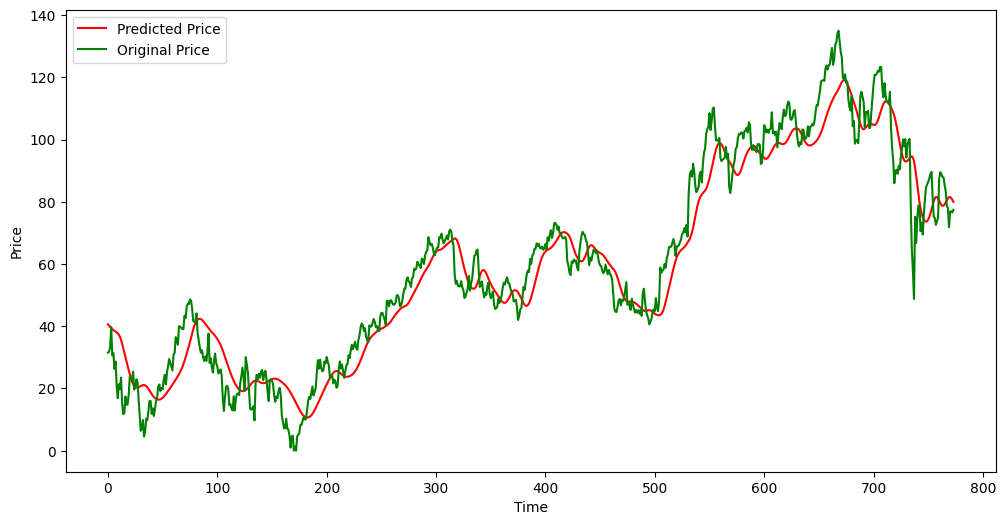

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()